In [2]:
# customer segmentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [4]:
df=pd.read_csv("/content/customer_segmentation.csv")
print(df.head())

   CustomerID  Age  Annual_Income  Spending_Score  Total_Purchases  Recency
0        1001   56          78053               8               35      156
1        1002   69          41959              27               33        8
2        1003   46          25530              27               33      122
3        1004   32         114856              98               43      348
4        1005   60         139101              21               37      164


In [5]:
print(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)


CustomerID         0
Age                0
Annual_Income      0
Spending_Score     0
Total_Purchases    0
Recency            0
dtype: int64


In [6]:
df.nunique()

,0
CustomerID,200
Age,51
Annual_Income,200
Spending_Score,81
Total_Purchases,49
Recency,156


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CustomerID       200 non-null    int64
 1   Age              200 non-null    int64
 2   Annual_Income    200 non-null    int64
 3   Spending_Score   200 non-null    int64
 4   Total_Purchases  200 non-null    int64
 5   Recency          200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [8]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score,Total_Purchases,Recency
count,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000
mean,1100.500000,43.42500,85957.25000,50.605000,25.670000,181.495000
std,57.879185,14.94191,38605.01739,29.649018,13.956181,106.449176
min,1001.000000,18.00000,20854.00000,1.000000,1.000000,1.000000
25%,1050.750000,31.00000,54740.00000,24.000000,13.000000,84.500000
50%,1100.500000,43.50000,86931.00000,51.000000,25.000000,189.000000
75%,1150.250000,56.00000,118200.00000,71.500000,37.000000,267.250000
max,1200.000000,69.00000,148391.00000,99.000000,49.000000,360.000000


In [9]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df.drop(columns=["CustomerID"]))


In [10]:
X_scaled

array([[ 0.84370444, -0.2052605 , -1.4405844 ,  0.67019861, -0.24010498],
       [ 1.71592374, -1.14256288, -0.79814564,  0.52653332, -1.63392876],
       [ 0.17276652, -1.56919725, -0.79814564,  0.52653332, -0.56030774],
       [-0.76654658,  0.75045346,  1.6025466 ,  1.2448598 ,  1.56809884],
       [ 1.11207961,  1.38005662, -1.00102104,  0.81386391, -0.16476316],
       [-1.23620312, -1.61547288, -0.69670794, -0.98195231, -0.86167505],
       [-0.36398382,  0.81921771,  1.56873403, -1.62844615, -0.42845955],
       [ 0.84370444,  0.83464292, -0.76433307, -1.77211145,  0.04242687],
       [-0.49817141, -1.36106075,  0.45291933,  0.52653332,  1.26673154],
       [-0.22979624,  1.60229394,  1.56873403,  1.02936186, -0.03291496],
       [-1.03492175,  0.00627785,  0.62198216, -1.12561761, -1.4455742 ],
       [-1.03492175, -0.80998595,  0.35148163,  1.2448598 ,  0.36262963],
       [-0.16270245,  0.19665198, -0.08808174,  1.31669245,  1.6528584 ],
       [ 0.64242306,  0.71672055, -1.0

In [11]:
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

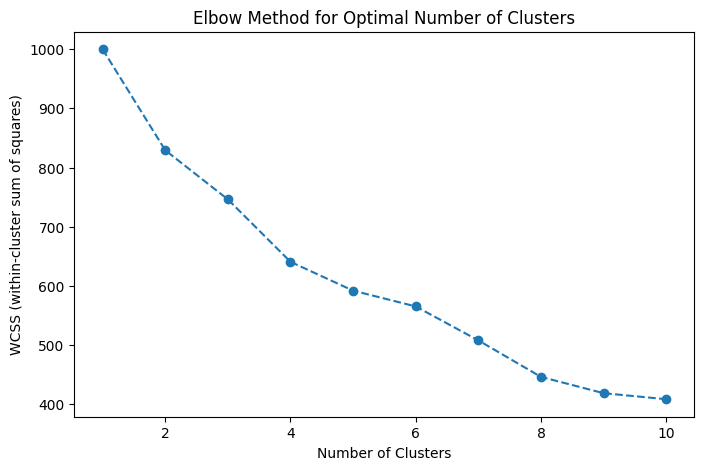

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (within-cluster sum of squares)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=2, init='k-means++', random_state=42)
df['Cluster']=kmeans.fit_predict(X_scaled)

In [14]:
silhouette_avg=silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.1615


In [15]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)


In [16]:
X_pca

array([[-1.11206730e-01,  1.00506155e-01],
       [ 8.19635373e-01, -1.40406662e-01],
       [-6.62323990e-01,  4.48176726e-01],
       [ 4.33933840e-01,  1.79000166e+00],
       [ 9.66839240e-01, -2.09626477e-01],
       [-1.69096985e+00, -8.54727506e-01],
       [ 7.44631834e-01, -1.27277905e+00],
       [ 4.93062047e-03, -1.63487325e+00],
       [-9.88199372e-01,  1.64024326e+00],
       [ 1.64654377e+00,  4.92245627e-01],
       [ 8.58580449e-03, -1.50272343e+00],
       [-6.01932998e-01,  1.35091098e+00],
       [-3.64245837e-01,  1.69411115e+00],
       [ 6.72299590e-01, -1.05416357e+00],
       [-7.43265770e-01, -6.77799267e-01],
       [-3.10084397e-01, -1.07612832e+00],
       [ 1.14153082e-01, -4.53183939e-01],
       [ 1.11648341e-01,  1.03264148e+00],
       [-1.47518848e+00, -2.00754259e+00],
       [-3.18485999e-01,  6.95145673e-01],
       [ 1.00105438e+00,  8.18930853e-01],
       [-1.14560700e-01, -1.10157800e+00],
       [ 1.43474794e+00, -4.26037821e-03],
       [-1.

In [17]:
df_pca=pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster']=df["Cluster"]

In [18]:
df_pca

,PC1,PC2,Cluster
0,-0.111207,0.100506,1
1,0.819635,-0.140407,0
2,-0.662324,0.448177,1
3,0.433934,1.790002,1
4,0.966839,-0.209626,0
...,...,...,...
195,1.898878,-0.345568,0
196,0.009077,-1.120451,0
197,-0.514333,1.243826,1
198,-1.146101,-2.137270,0


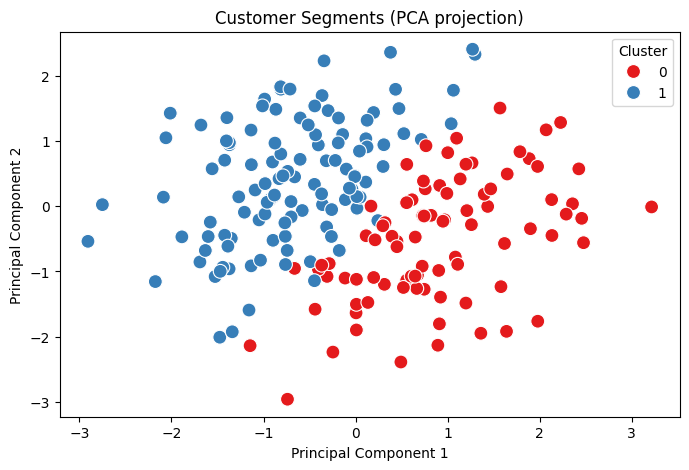

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, palette="Set1", s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments (PCA projection)")
plt.legend(title="Cluster")
plt.show()